### ANOVA(Analysis of Variance)
Ronald Fisher developed it; ANOVA (Analysis of Variance) is a statistical method for analyzing the relationship between more than two independent groups of a variable(comparing their means) and its effect on the numerical dependent variable. 

Why is that? Why can't we use t-tests instead of ANOVA?
It's all about the multiple testing problem.

#### Multiple Testing Problem
When we carry out too many null hypothesis significance tests, our α error(Type 1 error) level increases to a point where the result will not be reliable due to a high chance of falsely getting at least one significant(false positive). Here is how that happens:

P(Type 1 Error) = α
P(Not Making An Error) = 1-α     
P(Not Making An Error in k Test) = (1-α)^k
P(Making at Least 1 Error in k Test) = 1 - (1-α)^k

That means if we conduct 10 tests with a 0.05 α value, the probability of getting a significant result even though there are no actual significance increases to %40. 
1-(1-0.05)^10 = 1-(0.95)^10 = 1-0.5987 = 0.4013

That's why for comparing the means of more than two independent groups, ANOVA is a more appropriate method to apply. There are two types and different variations of ANOVA. 

One Way Anova: Compares the groups' samples means of only one independent variable; hence it's one way. 
Two Way Anova: Compares the groups' means(effect) of two categorical independent variables on one continuous dependent variable.
Manova(Multivariate Analysis of Variance): There are two or more dependent variables

In this article, I will share an example of conducting One Way ANOVA.
First, let's look at the steps to follow while conducting an ANOVA test.

Step 1: Specify the Null and Alternative Hypotheses 
Step2: Set a significance level of α 
Step 3: Check the data to make sure it complies with ANOVA assumptions
Step 4: Determine the F-critical value
Calculate test(F) statistic
Interprete the result

#### Specifying the Null & Alternative Hypothesis

Null Hypothesis: It's the default hypothesis against our assumptions about the study, which indicates no statistically significant difference between the groups. It can be something like this: There is no difference between the means of group A and group B.
Alternative Hypothesis: It states our assumption, so the purpose of our research about the data. It can be something like this: Group A's mean is significantly different from Group B.

In [57]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [63]:
#Create Artificial randomly distributed data representing students' exam results
USA = np.random.normal(loc=74,scale=4,size=40)
UK = np.random.normal(loc=88,scale=4,size=40)
Germany = np.random.normal(loc=84,scale=4,size=40)

In [64]:
for i in range(3):
    print(['USA: ','UK: ','Germany: '][i],[USA,UK,Germany][i].mean().round(1))

USA:  73.9
UK:  88.3
Germany:  84.8


In [65]:
#Create Dataframes representing each student groups
list_USA = []
for i in range(40): list_USA.append('USA')
df_USA = pd.DataFrame(data={'Country':list_USA,'Results':list(map(lambda x: x.round(1), USA))})
list_UK = []
for i in range(40): list_UK.append('UK')
df_UK = pd.DataFrame(data={'Country':list_UK,'Results':list(map(lambda x: x.round(1), UK))})
list_Germany = []
for i in range(40): list_Germany.append('Germany')
df_Germany = pd.DataFrame(data={'Country':list_Germany,'Results':list(map(lambda x: x.round(1), Germany))})

In [66]:
#Concatenate the data frames into one
df_students = df_USA.append([df_UK,df_Germany],ignore_index=True)
df_students

,Country,Results
0,USA,77.2
1,USA,70.4
2,USA,79.6
3,USA,68.4
4,USA,76.3
...,...,...
115,Germany,86.5
116,Germany,75.9
117,Germany,84.7
118,Germany,81.4


Now let's take a quick look at our data to see how it's distributed.

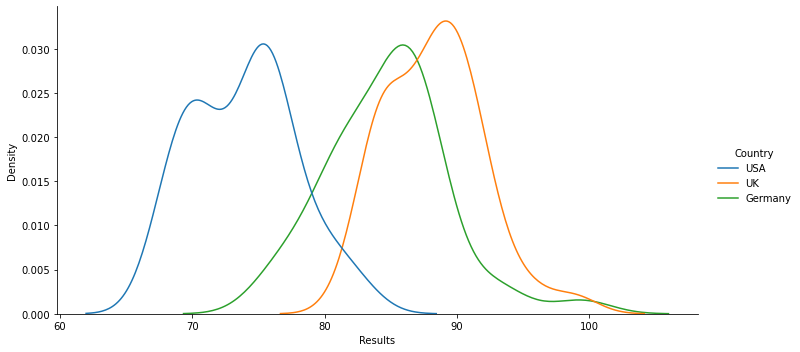

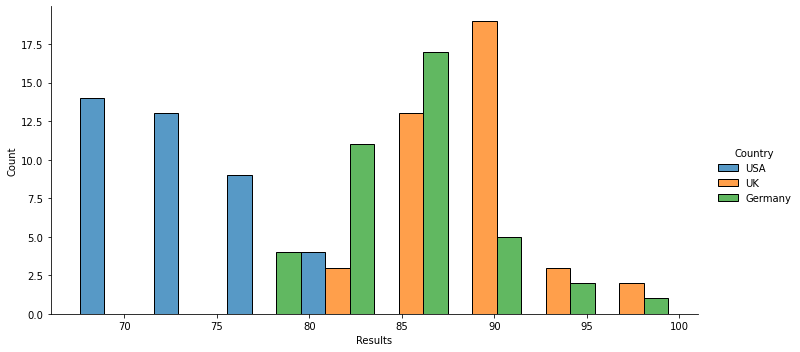

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.displot(df_students,x='Results',hue='Country',kind='kde',height=5,aspect=2)
sns.displot(df_students,x='Results',hue='Country',multiple='dodge',height=5,aspect=2)

Even though we can safely assume that the data we created fulfills the ANOVA assumptions, we will test each assumption so we know how to do it in the future when it is required.

In [85]:
#Normality:
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."

for i in range(3):
    print(["For the USA: ","For the UK: ","For the Germany: "][i], shapiro_test([USA,UK,Germany][i]))
    print('\n')

For the USA:  Shapiro Wilk Test result didn't show non-normality, W= 0.96, P value= 0.16. There is no evidence to reject the null hypothesis of normality.


For the UK:  Shapiro Wilk Test result didn't show non-normality, W= 0.96, P value= 0.22. There is no evidence to reject the null hypothesis of normality.


For the Germany:  Shapiro Wilk Test result didn't show non-normality, W= 0.95, P value= 0.09. There is no evidence to reject the null hypothesis of normality.


